#DATSCI W261, October 2015<br>JRW Solution, HW 6

##HW 6.0: Short answers
####In mathematics, computer science, economics, or management science what is mathematical optimization?

In mathematics, computer science, economics, or management science, mathematical optimization is the selection of a best element with regard to some criteria from some set of available alternatives.

####Give an example of an optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. 

Answers vary from person to person.

#####Was the project successful (deployed in the real world)? Describe.

Answers vary from person to person.

##HW 6.1 Optimization theory
####For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC). What are the second order optimality conditions (SOC)? Give a mathematical defintion.

For unconstrained univariate optimization of a function $f$, 
the first order necessary condition (FOC) for a point $x=c$ 
to be maximum or minimum, is that the first derivative of $f$
evaluated at the point $c$ be equal to zero. 
Mathematically, this condition is stated as:

$$\left.\frac{\text{d}f(x)}{\text{d}x}\right|_{x=c}=0$$

The second order optimality conditions require that the 
second derivative evaluated at $c$ be positive/negative
for the candidate point $x=c$ to be a minimum/maximum.
Mathematically, a maximum will satisfy:

$$\left.\frac{\text{d}^2f(x)}{\text{d}x^2}\right|_{x=c}<0$$

and a minimum will satisfy

$$\left.\frac{\text{d}^2f(x)}{\text{d}x^2}\right|_{x=c}>0$$

####In python, plot the univartiate function $f(x) = x^3−12x^2−6$, along with its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.

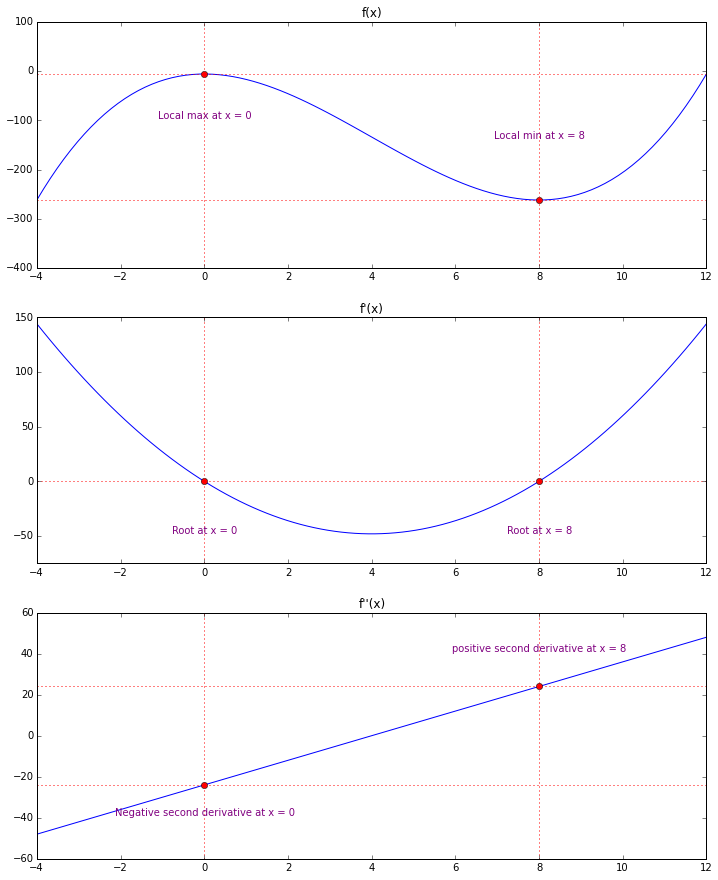

In [34]:
%matplotlib inline
from matplotlib import pyplot as py
import numpy as np

fig = py.figure(figsize = (12,15))

###
py.subplot(3,1,1)

x = np.linspace(-4,12,100)
fx = x**3 - 12*x**2 - 6

py.plot(x, fx)
py.ylim(-400, 100)

##
py.annotate(
    'Local max at x = 0', xy=(0, -80),
    horizontalalignment='center', 
    verticalalignment='top',color='purple'
           )
py.plot(0,-6,'o',color='r')
py.plot([-4,12],[-6,-6], color = 'r', linestyle = 'dotted')
py.plot([0,0],[-500,500], color = 'r', linestyle = 'dotted')

##
py.annotate(
    'Local min at x = 8', xy=(8, -120),
    horizontalalignment='center', 
    verticalalignment='top',color='purple'
           )
py.plot(8,-262,'o',color='r')
py.plot([-4,12],[-262,-262], color = 'r', linestyle = 'dotted')
py.plot([8,8],[-500,500], color = 'r', linestyle = 'dotted')

py.title("f(x)")
###

###
py.subplot(3,1,2)

d1fx = 3*x**2 - 24*x**1

py.plot(x, d1fx)
py.ylim(-75,150)
py.plot([-4,12],[0,0], color='r',linestyle='dotted')

##
py.annotate('Root at x = 0', xy=(0, -50),
             horizontalalignment='center', verticalalignment='bottom',color='purple')
py.plot(0,0,'o',color='r')
py.plot([0,0],[-75,150], color='r',linestyle='dotted')
##

##
py.annotate('Root at x = 8', xy=(8, -50),
             horizontalalignment='center', verticalalignment='bottom',color='purple')
py.plot(8,0,'o',color='r')
py.plot([8,8],[-75,150], color='r',linestyle='dotted')
##

py.title("f'(x)")
###

###
py.subplot(3,1,3)
d2fx = 6*x - 24
py.plot(x, d2fx)

##
py.plot([0,0],[-60,60], color='r',linestyle='dotted')
py.plot([-4,12],[-24,-24], color='r',linestyle='dotted')
py.plot(0,-24,'o',color='r')
py.annotate('Negative second derivative at x = 0', xy=(0, -40),
             horizontalalignment='center', verticalalignment='bottom', color='purple')
##

##
py.plot([8,8],[-60,60], color='r',linestyle='dotted')
py.plot([-4,12],[24,24], color='r',linestyle='dotted')
py.plot(8,24,'o',color='r')
py.annotate('positive second derivative at x = 8', xy=(8, 40),
             horizontalalignment='center', verticalalignment='bottom', color='purple')
##

py.title("f''(x)")
###

####Description
Observing $f$ (top panel) and $f'(x)$ (middle panel) derivative
over the range $[-4,12]$, or solving for the quadratic roots (FOC): 

$$f'(x) = 3x^2 - 24x = 0,$$

makes it easy to see the candidate local maximums and minimums exist at $x=0,8$.
By observing the sign (SOC) of the second derivative (bottom panel):

$$f''(x) = 6x - 24$$

at $x=0,8$, we are able tell that $x=0$ is indeed the local max, 
and that $x=8$ is the local min.

####For unconstrained multi-variate optimization, what are the first order Necessary Conditions for Optimality (FOC)? 
For the unconstrained optimization of a multi-varite function f(x), 
the first order necessary condition (FOC) states that the gradient 
at a specific point $x = c$ be the zero vector:

$$\left.\nabla f(x)\right|_{x=c} = \left[\left.\frac{\partial f(x)}{\partial x_1}\right|_{x=c},\cdots,\left.\frac{\partial f(x)}{\partial x_N}\right|_{x=c}\right] = (0,\cdots,0)$$

####What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?
For the second order optimality conditions, we must introduce the Hessian matrix
of second partial derivatives:

$$
H_f =
\large
\left[
\begin{array}{ccc}
    \frac{\partial^2 f(x)}{\partial x_1^2} & \cdots & \frac{\partial^2 f(x)}{\partial x_1\partial x_N} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial^2 f(x)}{\partial x_N\partial x_1} & \cdots & \frac{\partial^2 f(x)}{\partial x_N^2}
\end{array}
\right]
$$

The SOC states that if evaluation at the point $x=c$ renders $H_f$
negative/positive definite, i.e., all eigenvalues of $H_f$ 
are negative/positive, then the candidate point $x=c$ is a local maximizer/minimizer.


##HW 6.2: Root estimation with the Newton-Raphson method
####Taking $x_1=1$ as the first approximation of a root of $f(x)=x^3+2x-4$, use the Newton-Raphson method to calculate the second approximation, $x_2$, of this root. Hint: $x_2=1.2$.

The update rule for finding $x_{n+1}$ by the Newton-Raphonson method is
given by the evaluation of $f(x)$ at the zero of the line tangent to 
$f$ at $x_{n}$:

$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

So, with expressions for $f$ and $f'$, we have

$$x_{n+1} = x_{n} - \frac{x_{n}^3+2x_{n}-4}{3x_{n}^2+2}$$

into which we can substitute $x_{n} = 1$ to find:

$$
x_{2} 
= 
x_{1} - \frac{x_{1}^3+2x_{1}-4}{3x_{1}^2+2}
=
1 - \frac{1^3+2\cdot1-4}{3\cdot1^2+2}
=
1 - \frac{-1}{5}
=
1.2
$$

##HW 6.3 Convex optimization
####What makes an optimization problem convex?
An optimization problem is convex if it is posed for 
a convex objection function over a convex set.

A set $X$ in Euclidean space is convex if for every pair of points,
$x_1,x_2\in X$, every other point, $x_3$, along the straight line
segment connecting $x_1$ and $x_2$ lies in $X$. In other words,
supposinf $\ell$ is the line segment connecting $x_1$ and $x_2$
and $x_3\in\ell$, then $x_3\in X$.

A function $f(x)$ is convex over $X$ if for all
$x_1,x_2\in X$ and for all $t\in[0,1]$:

$$
f(tx_1-(1-t)x_2)\leq tf(x_1)-(1-t)f(x_2)
$$

Intuitively, a convex function lies below its chords.

####What are the first order Necessary Conditions for Optimality in convex optimization?
The first order necessary condition for optimality in convex optimization
states that for $x=c$ to be an extremum, the gradient evaluated at $c$ must
be equal to the zero vector:

$$\nabla f(c)=(0,\cdots,0)$$

####What are the second order optimality conditions for convex optimization?
If the problem is convex, then the Hessian is gauranteed to be positive semi-definite,
and a local minimum is a global minimum.

####Are both necessary to determine the maximum or minimum of candidate optimal solutions?
The first order optimality condition is both necessary and sufficient
for convex optimization. If the objective function is concave
(reverse the inequality in the convexity definition), 
then an extremum is a global maximum, 
and if the objective function is convex,
then an extremum will be a global minimum.

##HW 6.4: Weighted ordinary least squares gradient
####Derive the gradient for this weighted OLS by hand, showing each step and also explaining each step.
We are intersted in the gradient of the objective function:

$$\large J(X) = \frac{1}{2}\sum_i w_i(y_i - \beta^TX_i)^2$$

which can be expanded through the products of $\beta^TX_i$ as:

$$\large J(X) = \frac{1}{2}\sum_i w_i\left(y_i - \beta_0 - \sum_{k=1}^N\beta_jx_{i,k}\right)^2$$

This makes it straightforward to 
solve for the gradient partial derivative components individually:

$$\large \frac{\partial J(X)}{\partial \beta_j} = - \sum_i w_i x_{i,j}\left(y_i - \beta_0 - \sum_{k=1}^N\beta_jx_{i,k}\right)$$

for $j \in \left\{0, \cdots, N\right\}$ (where $x_{i,0} = 1$ for all $i$).
In matrix form this is nicely written as:

$$\large \nabla J(X) = - \sum_i w_i X_i(y_i - \beta^TX_i)$$

##HW 6.5: Distributed WOLS via gradient descent

####Generate one million heteroscedastic datapoints:
To get some milage out of our WOLS implementation, we'll take the line 

$$f(x) = x - 4$$

to be our 'truth,' subtracting/adding (for negative/positive values of $x$) 
absoluted-value normal noise such that the variance changes with x as:

$$\sigma^2(x) = x^2$$ 

For these heteroscedastic datapoints,

$$g(x) = f(x) + \text{sgn}(x)\left|n(\mu,\sigma^2(x))\right|$$ 

we'll weight our regression strongly with:

$$w(x) = \frac{1}{x^2}$$

for points where $|\:x\:| > 1$ (to prevent our weighting from 'blowing up')
at small values of x.

In [252]:
%matplotlib inline
#!/usr/bin/python
from matplotlib import pyplot as py
import numpy as np
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x - 4
for i in range(len(x)):        
    if x[i] < 0:
        y[i] -= abs(np.random.normal(0,abs(x[i]),1))
    else:
        y[i] += abs(np.random.normal(0,abs(x[i]),1))
    
data = zip(y,x)
np.savetxt('regressionPoints.csv',data,delimiter = ",")

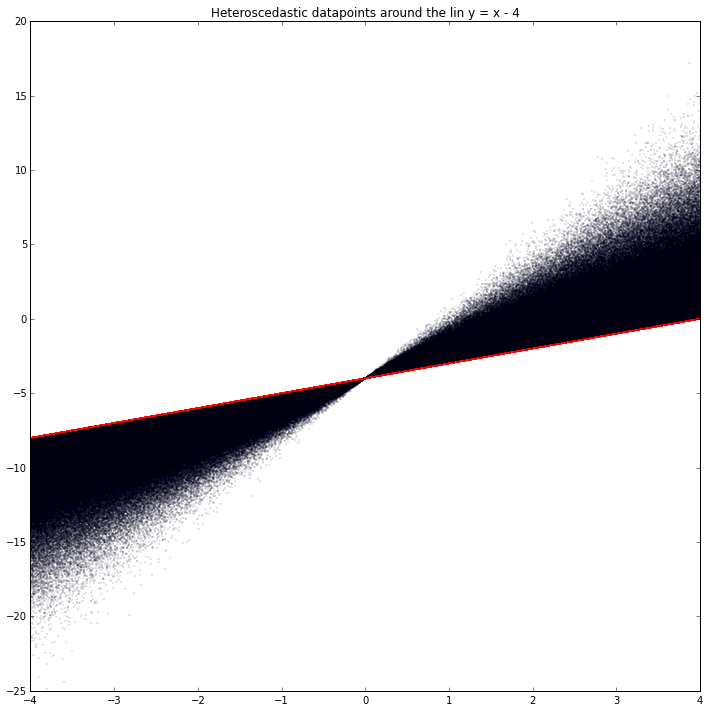

In [253]:
fig = py.figure(figsize = (12,12))
py.plot(x, y,'o',ms=0.25)
py.plot(x,x-4,color='r',linestyle='dotted')
py.title('Heteroscedastic datapoints around the lin y = x - 4')
py.show()

###MRJob class for OLS gradient descent 

In [254]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
#!/usr/bin/python
from mrjob.job import MRJob

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        # Update parial gradient vector with gradient frmm current example
        ## to make sure our weighting doesn't blow up
        if abs(D[1]) > 1:
            weight = 1/(abs(D[1])**2)
        else:
            weight = 1
        self.partial_Gradient =  [
            self.partial_Gradient[0] + (D[0]-y_hat)*weight, 
            self.partial_Gradient[1] + ((D[0]-y_hat)*D[1])*weight
        ]
        self.partial_count = self.partial_count + 1
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [self.mr(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


###Driver Code

In [261]:
%%writefile MrJobBatchGDUpdate_LinearRegression_driver.py
#!/usr/bin/python
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.005
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-4.1,-3.9),random.uniform(1.1,1.3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=[
        'regressionPoints.csv',
        '--file',
        'Weights.txt'
    ])
# Update centroids iteratively
i = 0
while(1):
    print "iteration = "+str(i)+"  weights = ",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights\n"
print weights

Overwriting MrJobBatchGDUpdate_LinearRegression_driver.py


In [262]:
!chmod +x MrJobBatchGDUpdate_LinearRegression_driver.py MrJobBatchGDUpdate_LinearRegression.py

####Sample run with initialization close to target, ensuring speedy convergence

In [263]:
!time ./MrJobBatchGDUpdate_LinearRegression_driver.py

iteration = 0  weights =  [-3.96189898  1.15943387]
No handlers could be found for logger "mrjob.job"
iteration = 1  weights =  [-3.96198065  1.16209283]
iteration = 2  weights =  [-3.96206215  1.16474069]
iteration = 3  weights =  [-3.96214348  1.16737752]
iteration = 4  weights =  [-3.96222464  1.17000334]
iteration = 5  weights =  [-3.96230563  1.17261822]
iteration = 6  weights =  [-3.96238645  1.1752222 ]
iteration = 7  weights =  [-3.9624671   1.17781531]
iteration = 8  weights =  [-3.96254758  1.18039762]
iteration = 9  weights =  [-3.9626279   1.18296915]
iteration = 10  weights =  [-3.96270804  1.18552996]
iteration = 11  weights =  [-3.96278802  1.1880801 ]
iteration = 12  weights =  [-3.96286783  1.1906196 ]
iteration = 13  weights =  [-3.96294747  1.1931485 ]
iteration = 14  weights =  [-3.96302694  1.19566687]
iteration = 15  weights =  [-3.96310625  1.19817473]
iteration = 16  weights =  [-3.96318539  1.20067213]
iteration = 17  weights =  [-3.96326436  1.20315912]
iterat

####With an initialization close to our target it is not necessary to run our gradient descent WOLS optimization on AWS, since we achieve a good convergence of parameters after $\approx4.5$ mins.

###Find package OLS and WOLS fits for a $1\%$ sample of our heteroscedastic datapoints, plot these results against those obtained from gradient descent, and discuss.

In [264]:
from numpy.polynomial.polynomial import polyfit
from numpy.random import choice

idx = choice(range(len(x)), 0.01*len(x))
## OLS
weights = float(1)/(x*0 + 1)
result1 = polyfit(x[idx], y[idx], 1, w=weights[idx])
print "The intercept and slope from applying OLS to our sample:"
print result1[0],result1[1]
print ""
## WOLS with w = 1/abs(x)
weights = float(1)/(abs(x))
result2 = polyfit(x[idx], y[idx], 1, w=weights[idx])
print "The intercept and slope from applying weakly weighted OLS to our sample:"
print result2[0],result2[1]
print ""
##WOLS with w = 1/x**2
weights = float(1)/(x**2)
result3 = polyfit(x[idx], y[idx], 1, w=weights[idx])
print "The intercept and slope from applying strongly weighted OLS to our sample:"
print result3[0],result3[1]
print ""

The intercept and slope from applying OLS to our sample:
-3.9989621099 1.79093438466

The intercept and slope from applying weakly weighted OLS to our sample:
-3.99998723865 1.79269874428

The intercept and slope from applying strongly weighted OLS to our sample:
-3.99999764267 1.55106613916



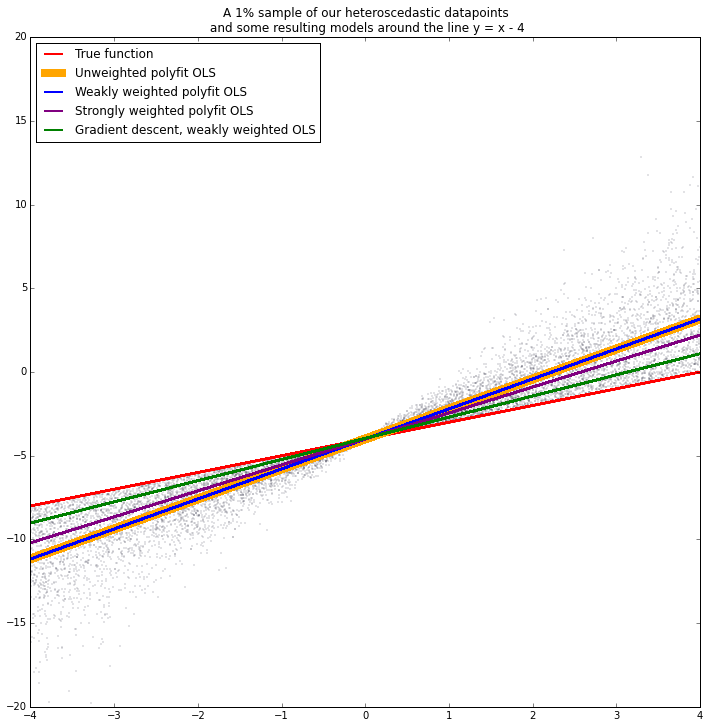

In [271]:
fig = py.figure(figsize = (12,12))
py.ylim(-20,20)

py.plot(x[idx], y[idx],'o',ms=0.25)
py.plot(
    x[idx],x[idx]-4,
    color='r',linestyle='solid',
    label="True function",lw = 2
)
py.plot(
    x[idx],result1[1]*x[idx]+result1[0],lw = 8,
    color='orange',linestyle='solid',label="Unweighted polyfit OLS"
)
py.plot(
    x[idx],result2[1]*x[idx]+result2[0],lw = 2,
    color='blue',linestyle='solid',label="Weakly weighted polyfit OLS"
)
py.plot(
    x[idx],result3[1]*x[idx]+result3[0],lw = 2,
    color='purple',linestyle='solid', label="Strongly weighted polyfit OLS"
)
py.plot(
    x[idx],1.26430412*x[idx]-3.9652605,lw = 2,
    color='green',linestyle='solid', label="Gradient descent, weakly weighted OLS"
)
py.title('A 1% sample of our heteroscedastic datapoints \n and some resulting models around the line y = x - 4')
py.legend(loc=2)
py.show()

####Discussion
As we can see, OLS provides a result (orange) that is far from the truth (red), 
and further, even WLOS with $w(x)=\frac{1}{|\:x\:|}$ (blue) does not do
enough to counteract the heteroscedasticity of our data (producing nearly identical results). 
Adjusting out weighting to the stronger (pink):

$$w(x)=\frac{1}{x^2}$$

we obtain a desirable result, that is closer to the output
of our strongly weighted, distributed gradient descent (green), 
applied to the whole data.